# 1. Import packages & inspect the data

In [1]:
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

You can copy the directory of the csv file as follows, or create a new notebook from the Kaggle dataset: [https://www.kaggle.com/datasets/ryandinh/agricultural-production-optimization/data](url)

In [2]:
crop_df = pd.read_csv('data (1).csv')

In [3]:
print("Dataset shape: ", crop_df.shape)

Dataset shape:  (2200, 8)


In [4]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# 2. Check for abnormalities in the dataset

We can use the `isnull()` function to check for N/A values. Luckily, our dataset does not have any null value, and has probably been cleaned.

In [5]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# 3. Descriptive analysis

This section is mainly focus on inspecting some basic descriptive attributes of condition type, with each crop.

In [6]:
print("Average Nitrogen Ratio: {0:.2f}".format(crop_df['N'].mean()))
print("Average Phosphorous Ratio: {0:.2f}".format(crop_df['P'].mean()))
print("Average Potassium Ratio: {0:.2f}".format(crop_df['K'].mean()))
print("Average Temperature (C): {0:.2f}".format(crop_df['temperature'].mean()))
print("Average Humidity: {0:.2f}".format(crop_df['humidity'].mean()))
print("Average pH value: {0:.2f}".format(crop_df['ph'].mean()))
print("Average Rainfall: {0:.2f}".format(crop_df['rainfall'].mean()))

Average Nitrogen Ratio: 50.55
Average Phosphorous Ratio: 53.36
Average Potassium Ratio: 48.15
Average Temperature (C): 25.62
Average Humidity: 71.48
Average pH value: 6.47
Average Rainfall: 103.46


# 4. Data distribution

This is where Python proves to also be a powerful graphs and charts maker. We will use `distplot()` for each climatic conditions, since it displays a bar chart as well as a smooth line. You can choose similar plotting options like `displot()` or `histplot()`. 

Another useful display option is the `subplot(a, b, c)` function, where `a` is number of rows, `b` is number of columns, and `c` is index number. `subplot()` creates an array to put multiple plots in, where you can modify the array's dimensions, and add the index `c`  of the plot. The plots will be put into the array created in the order of the designated indices, from left to right, top to bottom.

C:\Users\HP\AppData\Local\Temp\ipykernel_8992\3331780623.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_df['N'], color = 'lightpink')
C:\Users\HP\AppData\Local\Temp\ipykernel_8992\3331780623.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_df['P'], color = 'blue')
C:\Users\HP\A

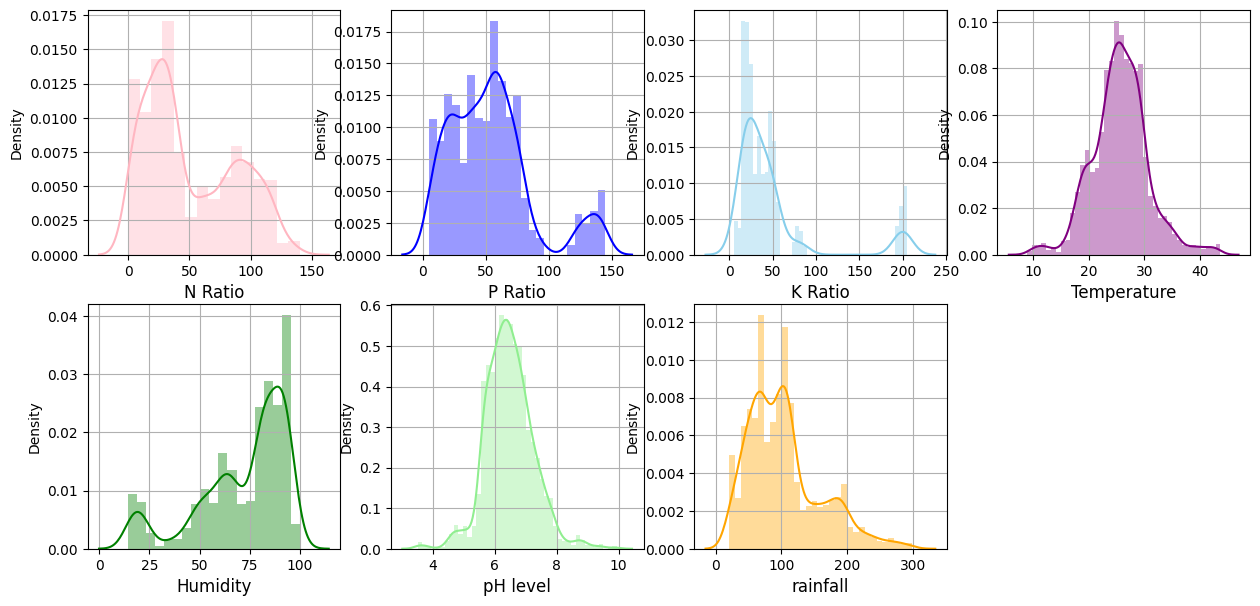

In [11]:
plt.rcParams['figure.figsize'] = (15,7)

plt.subplot(2, 4, 1)
sns.distplot(crop_df['N'], color = 'lightpink')
plt.xlabel('N Ratio', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(crop_df['P'], color = 'blue')
plt.xlabel('P Ratio', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(crop_df['K'], color = 'skyblue')
plt.xlabel('K Ratio', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(crop_df['temperature'], color = 'purple')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(crop_df['humidity'], color = 'green')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(crop_df['ph'], color = 'lightgreen')
plt.xlabel('pH level', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(crop_df['rainfall'], color = 'orange')
plt.xlabel('rainfall', fontsize = 12)
plt.grid()

# 5. Predictions & Model Validation

To use our model to predict, we have to create a training set and a test set. The first set is used to train the model, while the second validates the training results. 
Here we use the Support Vector Machines (SVM) Linear model to predict and validate our predictive accuracy. You can substitute SVM for any linear model to optimize with your dataset. Check the list of linear models available in `scikit` and `sklearn` here: [https://scikit-learn.org/stable/modules/linear_model.html#](url)

In [13]:
y = crop_df['label']
x = crop_df.drop(['label'], axis = 1)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

#initialize and train the SVM model
model = SVC(kernel='linear')

#not good as there would be chances of  micategarisation.
model.fit(x_train, y_train)
y_pred = model.predict(x_test) #predictions on the testing set

In [14]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

In [17]:
user_input ={
    'N' : int(input("Enter value of N")),
    'P' : int(input("Enter value of P")),
    'K' : int(input("Enter value of K")),
    'temperature' : float(input("Enter temperature")),
    'humidity' : float(input("Enter Humidity")),
    'ph' : float(input("Enter ph")),
    'rainfall' : float(input("Enter Rainfall"))
}
user_input_df = pd.DataFrame([user_input])
predicted_output = model.predict(user_input_df)
print("Label:", predicted_output[0])

Enter value of N 9
Enter value of P 9
Enter value of K 9
Enter temperature 9
Enter Humidity 9
Enter ph 9
Enter Rainfall 9


Label: mothbeans
